# Pre-processing data
This section intended only to importing library that used in the processing step. The library that used are:
1.   Color thief
2.   matplotlib
3.   pandas
4.   Scikit-learn
5.   numpy

After the library accessed, the next text block contained code to access data sample and extract RGB code from the sample.

In [ ]:
#Importing library

!pip install colorthief #Installing colorthief
from colorthief import ColorThief #Importing colorthief library
import matplotlib.pyplot as plt #Importing matplotlib to be use in data visualization process
import pandas as pd #Importing pandas to be use in analyzing data process
from sklearn.decomposition import PCA #Importing scikit-learn to be use in PCA transformation process
import numpy as np #Importing numpy to do mathematical process

In [ ]:
#Defining program code

class ColorAnalyzer:

  #Initialization
  def __init__(self, image_files):
    self.image_files = image_files
    self.dominant_colors = [] #To store result of extraction
    self.pca_transformed_data = [] # To store result of PCA
    self.duplicates = [] # To store duplicate color info

  #Identify dominant color from each sample
  def _get_dominant_color_from_image(self, image_file):
    ct = ColorThief(image_file)
    dominant_color = ct.get_color(quality=1)
    return dominant_color

  #Extracting RGB code from the dominant color
  def extract_dominant_colors(self):
    print("Extracting dominant colors...")
    self.dominant_colors = [self._get_dominant_color_from_image(image) for image in self.image_files]
    print(f"Extracted {len(self.dominant_colors)} dominant colors.")
    return self.dominant_colors # Optionally return, but primarily stores internally

In [ ]:
class ProcessingData:
  def __init__(self, analyzer):
    self.analyzer = analyzer
    self.pca_transformed_data = [] # To store result of PCA
    self.duplicates = [] # To store duplicate color info

  @staticmethod
  def calculate_brightness(rgb_color):
    r, g, b = rgb_color
    return ((0.2126 * r) + (0.7152 * g) + (0.0722 * b)) / 255

  def display_dominant_colors(self):
    print("\nRGB-Code from every sample: ")
    for i, color in enumerate(self.analyzer.dominant_colors):
      hex_color = f"#{color[0]:02x}{color[1]:02x}{color[2]:02x}"
      brightness = self.calculate_brightness(color)
      print(f"W{i+1}: - RGB Code: {color}, HEX: {hex_color}, Brightness: {brightness:.3f}")

  #Checks for duplicate dominant color from each image samples
  def check_duplicate_colors(self):
    color_to_first_index_map = {} # Stores color -> first occurrence index (1-based)
    self.duplicates = [] # To store duplicate color info
    if not self.analyzer.dominant_colors:
      print("No dominant colors to check for duplicates. Please extract colors first.")
      return

    for i, color in enumerate(self.analyzer.dominant_colors):
      current_index = i + 1 # Convert to 1-based index
      if color in color_to_first_index_map:
        # If color already seen, record the pair (first occurence, current occurence)
        self.duplicates.append((color_to_first_index_map[color], current_index))
      else:
        # If color is new, add it to the map
        color_to_first_index_map[color] = current_index

    if self.duplicates:
      print(f"Found {len(self.duplicates)} pairs of images with duplicate dominant colors.")
    else:
      print("No pairs of images with duplicate dominant colors found.")
    return self.duplicates

  # Performing Principle Component Analysis on the dominant colors to reduce dimension
  def perform_pca(self):
    if not self.analyzer.dominant_colors:
      print("No dominant colors to perform PCA on. Please extract colors first.")
      return None

    # Convert list of RGB tuples to a NumPy array
    colors_array = np.array(self.analyzer.dominant_colors)

    #Initialize PCA transformation
    pca = PCA(n_components=2)

    #Fit PCA and transform the data and store the result
    self.pca_transformed_data = pca.fit_transform(colors_array)
    print(f"PCA transformed data shape: {self.pca_transformed_data.shape}")
    return self.pca_transformed_data

  # Method to check if samples are getting lighter
  def check_lightening_trend(self):
    print("\nChecking if samples are getting lighter...")
    if not self.analyzer.dominant_colors or len(self.analyzer.dominant_colors) < 2:
      print("Not enough samples to determine lightening trend.")
      return False

    brightness_values = [
        self.calculate_brightness(color)
        for color in self.analyzer.dominant_colors
    ]

    is_getting_lighter = True
    for i in range(len(brightness_values) - 1):
      # If current sample is NOT lighter (or equal) than the next, the trend is broken
      if brightness_values[i] >= brightness_values[i+1]:
        is_getting_lighter = False
        break

    if is_getting_lighter:
      print("Samples are consistently getting lighter from sample 1 to sample 9.")
    else:
      print("Samples are NOT consistently getting lighter from sample 1 to sample 9.")
    return is_getting_lighter

# **Dark Sand Sample**

# Processing Data
This section concentrated on analyzing and visualizing the sample. There are 4 steps of analyzing and 2 visuals that need to be done, which are:
1.   Make a color pallete to visualize the difference in every sample
2.   Transform 3-Dimension RGB into 2-Dimension with Principle Component Analysis
3.   RGB coordinate of every sample
4.   Visualize 2D RBG

In [ ]:
#Accessing image of Dark Sand samples that soon to be extracted.
image_files = [f"Dark_T{i}.png" for i in range(0,9)]

In [ ]:
# Create an instance of ColorAnalyzer and perform operations
analyzer = ColorAnalyzer(image_files)
dom_color = analyzer.extract_dominant_colors()

# Create an instance of ProcessingData
processor = ProcessingData(analyzer)

# Call the methods on the ProcessingData instance
duplicates = processor.check_duplicate_colors()
processor.display_dominant_colors()

# Check for lightening trend
is_lighter_trend = processor.check_lightening_trend()

Extracting dominant colors...
Extracted 9 dominant colors.
Found 1 pairs of images with duplicate dominant colors.

RGB-Code from every sample: 
W1: - RGB Code: (74, 65, 48), HEX: #4a4130, Brightness: 0.258
W2: - RGB Code: (114, 102, 79), HEX: #72664f, Brightness: 0.403
W3: - RGB Code: (114, 102, 79), HEX: #72664f, Brightness: 0.403
W4: - RGB Code: (115, 103, 79), HEX: #73674f, Brightness: 0.407
W5: - RGB Code: (127, 116, 92), HEX: #7f745c, Brightness: 0.457
W6: - RGB Code: (166, 155, 132), HEX: #a69b84, Brightness: 0.611
W7: - RGB Code: (183, 172, 150), HEX: #b7ac96, Brightness: 0.677
W8: - RGB Code: (188, 177, 154), HEX: #bcb19a, Brightness: 0.697
W9: - RGB Code: (184, 173, 149), HEX: #b8ad95, Brightness: 0.681

Checking if samples are getting lighter...
Samples are NOT consistently getting lighter from sample 1 to sample 9.


# Visualizing Data

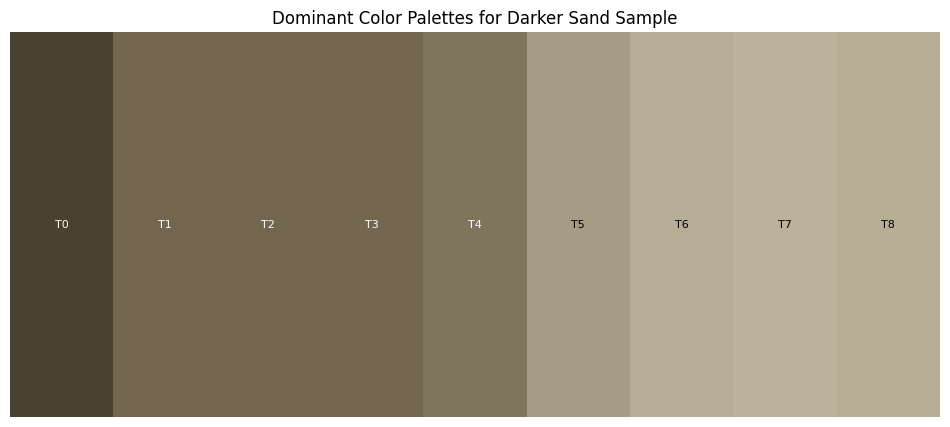

In [ ]:
# Code to make color palletes

#Set the number of grids
num_column = 9 #Setting the number of columns
num_rows = (len(dom_color) + num_column - 1) // num_column #Set the number of rows dynamically

#Making palletes grid
fig, ax = plt.subplots(figsize=(12, 5))

# Remove axes
ax.set_axis_off()

for i, color in enumerate(dom_color):
    row = i // num_column
    col = i % num_column

    # Calculate position for each color block
    rect_x = col / num_column
    rect_y = 1 - (row + 1) / num_rows
    rect_width = 1 / num_column
    rect_height = 1 / num_rows

    # Create a rectangle for the color
    rect = plt.Rectangle((rect_x, rect_y), rect_width, rect_height, facecolor=[c/255 for c in color])
    ax.add_patch(rect)

    # Calculate perceived brightness for the current color
    r, g, b = color
    # Using the ITU-R BT.709 standard for luminance
    brightness = (0.2126 * r + 0.7152 * g + 0.0722 * b) / 255
    text_color = 'white' if brightness < 0.5 else 'black' # Choose text color based on brightness

    # Add text label (optional: image number or RGB value)
    ax.text(rect_x + rect_width / 2, rect_y + rect_height / 2, f'T{i}',
            color=text_color, ha='center', va='center', fontsize=8)

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
plt.title('Dominant Color Palettes for Darker Sand Sample')
plt.show()

In [ ]:
processor.perform_pca()
print("PCA Transformed Data (2D RGB):")
print(analyzer.pca_transformed_data)

Performing PCA on dominant colors...
PCA transformed data shape: (9, 2)
PCA Transformed Data (2D RGB):
[[-1.09696046e+02  4.17150541e+00]
 [-4.72639520e+01 -1.49640932e+00]
 [-4.72639520e+01 -1.49640932e+00]
 [-4.60985919e+01 -2.25940495e+00]
 [-2.41676026e+01 -1.37097296e+00]
 [ 4.39429812e+01  2.92225519e-01]
 [ 7.39517959e+01  1.46031243e+00]
 [ 8.20447503e+01  7.87337088e-01]
 [ 7.45506175e+01 -8.81838959e-02]]


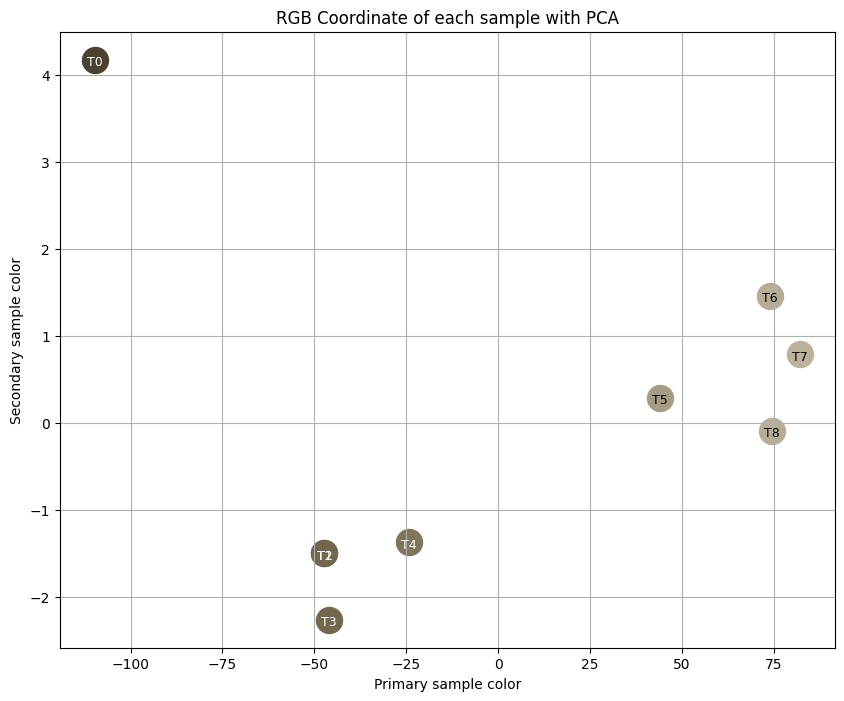

In [ ]:
plt.figure(figsize=(10, 8)) # Increased figure size for higher resolution

# Calculate perceived brightness for each color (luminance formula)
brightness_values = [
    (0.2126 * r + 0.7152 * g + 0.0722 * b) / 255
    for r, g, b in analyzer.dominant_colors
]

for i, (x, y) in enumerate(analyzer.pca_transformed_data):
    original_color = analyzer.dominant_colors[i]
    # Calculate perceived brightness for the current color
    r, g, b = original_color # Corrected: Use original_color from the loop
    # Using the ITU-R BT.709 standard for luminance
    brightness = (0.2126 * r + 0.7152 * g + 0.0722 * b) / 255
    text_color = 'white' if brightness < 0.5 else 'black' # Choose text color based on brightness
    plt.scatter(x, y, color=[c/255 for c in original_color], s=350, label=f'T{i}')
    plt.annotate(f'T{i}', (x, y), color=text_color, textcoords="offset points", xytext=(0, 3), ha='center', va='top', fontsize=9)

plt.xlabel('Primary sample color')
plt.ylabel('Secondary sample color')
plt.title('RGB Coordinate of each sample with PCA')
plt.grid(True)
plt.show()

# **Light Sand Sample**

# Processing Data
This section concentrated on analyzing and visualizing the sample. There are 4 steps of analyzing and 2 visuals that need to be done, which are:
1.   Make a color pallete to visualize the difference in every sample
2.   Transform 3-Dimension RGB into 2-Dimension with Principle Component Analysis
3.   RGB coordinate of every sample
4.   Visualize 2D RBG

In [ ]:
#Accessing image of Light Sand samples that soon to be extracted.
image_files = [f"Light_T{i}.png" for i in range(0,9)]

In [ ]:
# Create an instance of ColorAnalyzer and perform operations
analyzer = ColorAnalyzer(image_files)
dom_color = analyzer.extract_dominant_colors()

# Create an instance of ProcessingData
processor = ProcessingData(analyzer)

# Call the methods on the ProcessingData instance
duplicates = processor.check_duplicate_colors()
processor.display_dominant_colors()

# Check for lightening trend
is_lighter_trend = processor.check_lightening_trend()

Extracting dominant colors...
Extracted 9 dominant colors.
Checking for duplicate dominant colors...
No duplicate dominant colors found.

RGB-Code from every sample: 
W1: - RGB Code: (137, 120, 89), HEX: #897859, Brightness: 0.476
W2: - RGB Code: (177, 158, 122), HEX: #b19e7a, Brightness: 0.625
W3: - RGB Code: (177, 159, 121), HEX: #b19f79, Brightness: 0.628
W4: - RGB Code: (179, 157, 120), HEX: #b39d78, Brightness: 0.624
W5: - RGB Code: (159, 140, 106), HEX: #9f8c6a, Brightness: 0.555
W6: - RGB Code: (193, 179, 149), HEX: #c1b395, Brightness: 0.705
W7: - RGB Code: (214, 202, 176), HEX: #d6cab0, Brightness: 0.795
W8: - RGB Code: (216, 205, 177), HEX: #d8cdb1, Brightness: 0.805
W9: - RGB Code: (216, 204, 176), HEX: #d8ccb0, Brightness: 0.802

Checking if samples are getting lighter...
Samples are NOT consistently getting lighter from sample 1 to sample 9.


# Visualizing Data

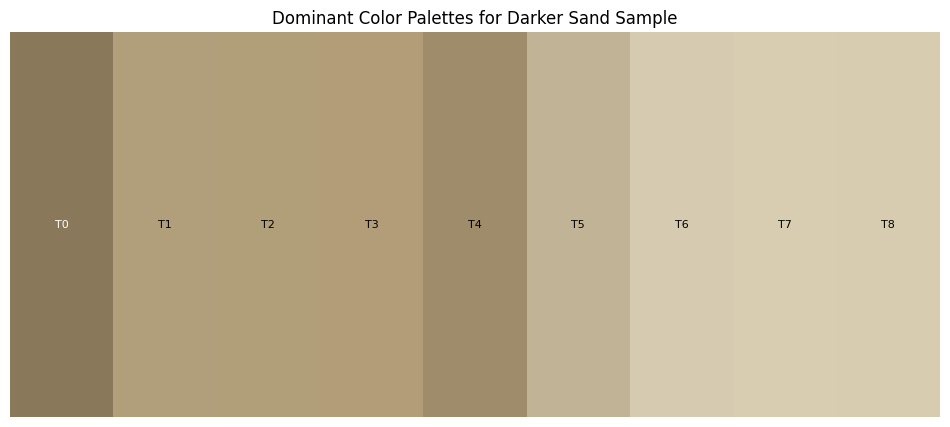

In [ ]:
# Code to make color palletes

#Set the number of grids
num_column = 9 #Setting the number of columns
num_rows = (len(dom_color) + num_column - 1) // num_column #Set the number of rows dynamically

#Making palletes grid
fig, ax = plt.subplots(figsize=(12, 5))

# Remove axes
ax.set_axis_off()

for i, color in enumerate(dom_color):
    row = i // num_column
    col = i % num_column

    # Calculate position for each color block
    rect_x = col / num_column
    rect_y = 1 - (row + 1) / num_rows
    rect_width = 1 / num_column
    rect_height = 1 / num_rows

    # Create a rectangle for the color
    rect = plt.Rectangle((rect_x, rect_y), rect_width, rect_height, facecolor=[c/255 for c in color])
    ax.add_patch(rect)

    # Calculate perceived brightness for the current color
    r, g, b = color
    # Using the ITU-R BT.709 standard for luminance
    brightness = (0.2126 * r + 0.7152 * g + 0.0722 * b) / 255
    text_color = 'white' if brightness < 0.5 else 'black' # Choose text color based on brightness

    # Add text label (optional: image number or RGB value)
    ax.text(rect_x + rect_width / 2, rect_y + rect_height / 2, f'T{i}',
            color=text_color, ha='center', va='center', fontsize=8)

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
plt.title('Dominant Color Palettes for Darker Sand Sample')
plt.show()

In [ ]:
processor.perform_pca()
print("PCA Transformed Data (2D RGB):")
print(analyzer.pca_transformed_data)

Performing PCA on dominant colors...
PCA transformed data shape: (9, 2)
PCA Transformed Data (2D RGB):
[[-84.02563201  -6.75961418]
 [-20.53707824   3.34980042]
 [-20.59161992   4.18044587]
 [-21.3394723    6.02117697]
 [-50.35199792  -0.51521643]
 [ 16.91541458  -1.47810106]
 [ 58.11380223  -2.52483029]
 [ 61.51231753  -1.41994726]
 [ 60.30426605  -0.85371404]]


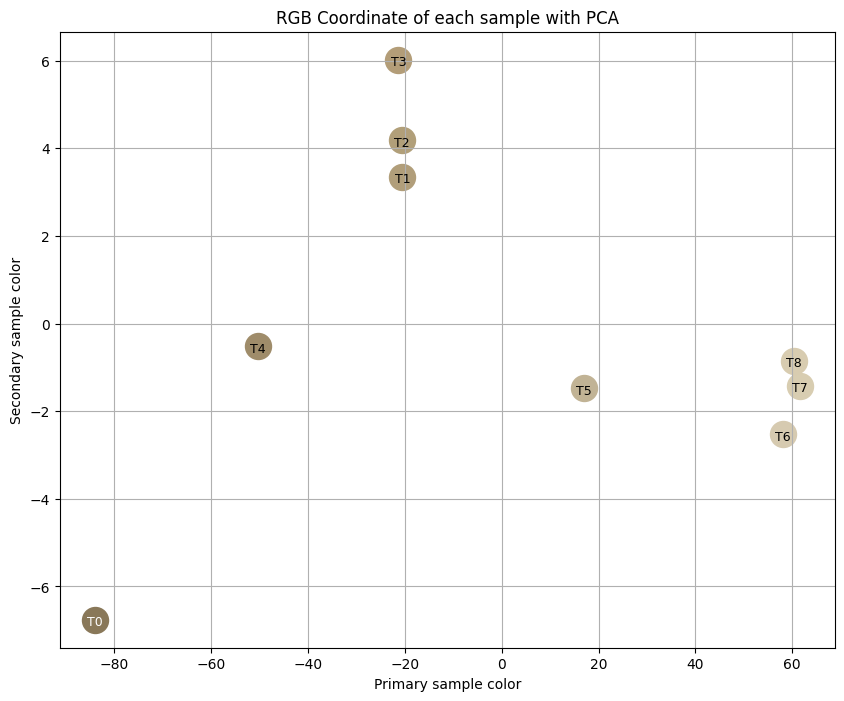

In [ ]:
plt.figure(figsize=(10, 8)) # Increased figure size for higher resolution

# Calculate perceived brightness for each color (luminance formula)
brightness_values = [
    (0.2126 * r + 0.7152 * g + 0.0722 * b) / 255
    for r, g, b in analyzer.dominant_colors
]

for i, (x, y) in enumerate(analyzer.pca_transformed_data):
    original_color = analyzer.dominant_colors[i]
    # Calculate perceived brightness for the current color
    r, g, b = original_color # Corrected: Use original_color from the loop
    # Using the ITU-R BT.709 standard for luminance
    brightness = (0.2126 * r + 0.7152 * g + 0.0722 * b) / 255
    text_color = 'white' if brightness < 0.5 else 'black' # Choose text color based on brightness
    plt.scatter(x, y, color=[c/255 for c in original_color], s=350, label=f'T{i}')
    plt.annotate(f'T{i}', (x, y), color=text_color, textcoords="offset points", xytext=(0, 3), ha='center', va='top', fontsize=9)

plt.xlabel('Primary sample color')
plt.ylabel('Secondary sample color')
plt.title('RGB Coordinate of each sample with PCA')
plt.grid(True)
plt.show()